# Sprint 4, Task 2

## Level 1

### Exercise 1

Complete the exercise found at the GitHub Notebook "03 EXAMINING DATA" with Seaborn and the dataset "tips".

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# Open dataset

ds = pd.read_csv("tips.csv")
ds.head(10)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


/Users/pau/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


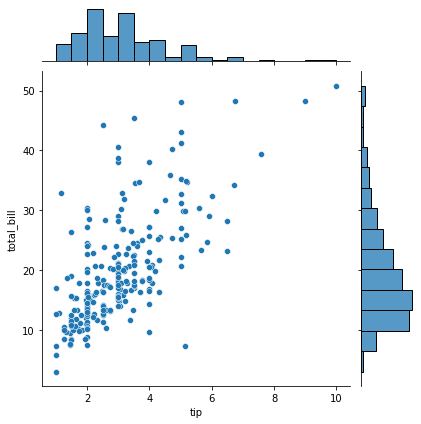

In [3]:
# Scatterplot of relationship between total bill price and tip

sns.jointplot("tip", "total_bill", data=ds)

<AxesSubplot:xlabel='tip', ylabel='time'>

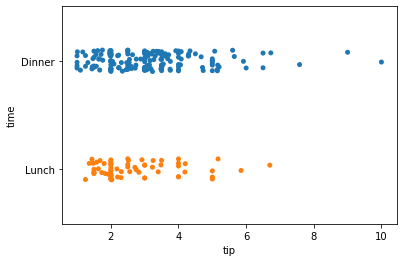

In [4]:
# Relationship between time of day and tip

sns.stripplot(x= "tip", y = "time", data=ds)

<AxesSubplot:xlabel='day', ylabel='tip'>

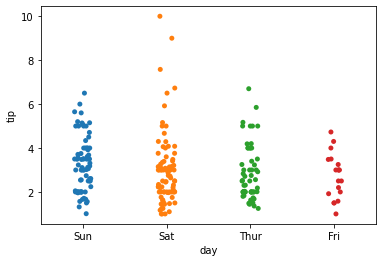

In [5]:
# Relationship between day of the week and tip amount 

sns.stripplot(y= "tip", x = "day", data=ds)

array([[<AxesSubplot:title={'center':'tip'}>]], dtype=object)

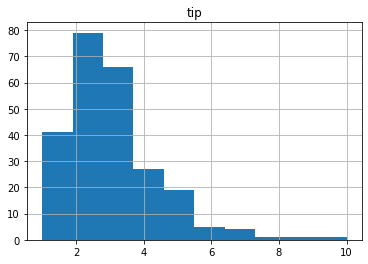

In [6]:
# Tip amount histogram: The tips plot is unimodal (2) and right-skewed 

ds.hist(["tip"])


In [7]:
ds.tip.mean()

2.9982786885245902

<AxesSubplot:xlabel='tip'>

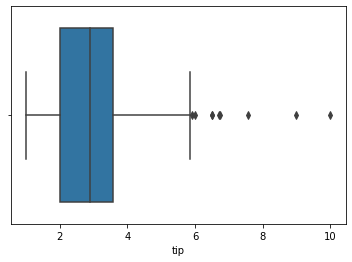

In [8]:
sns.boxplot(x="tip", data=ds)

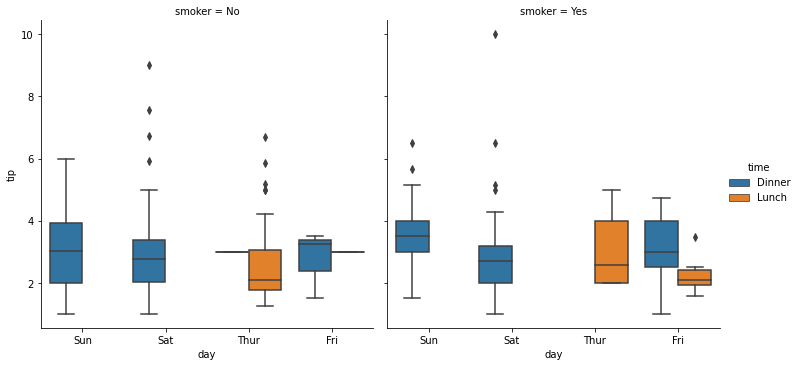

In [9]:
# Boxplot including day of the week, smoker, time of day and weekday

sns.catplot(x='day', y='tip', hue='time', col='smoker', kind='box', data=ds)

## Level 2

### Exercise 2

Repeat Exercise 1 with the movies.dat dataset found on GitHub.

In [10]:
data = pd.read_csv("movies.csv", sep='::', header=None, names = ("Name", "Year", "Genre"), engine='python')
data.head(10)

,Name,Year,Genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children's
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [11]:
data["New"] = data["Year"].apply(lambda x: int(str(x)[-5:-1]))

del data["Name"]

data.head()

,Year,Genre,New
0,Toy Story (1995),Animation|Children's|Comedy,1995
1,Jumanji (1995),Adventure|Children's|Fantasy,1995
2,Grumpier Old Men (1995),Comedy|Romance,1995
3,Waiting to Exhale (1995),Comedy|Drama,1995
4,Father of the Bride Part II (1995),Comedy,1995


In [12]:
data['Year'] = data['Year'].map(lambda x: str(x)[:-6])

data.rename(columns = {'Year':'Name', 'Genre':'Genre','New':'Year'}, inplace = True)

data.head()

,Name,Genre,Year
0,Toy Story,Animation|Children's|Comedy,1995
1,Jumanji,Adventure|Children's|Fantasy,1995
2,Grumpier Old Men,Comedy|Romance,1995
3,Waiting to Exhale,Comedy|Drama,1995
4,Father of the Bride Part II,Comedy,1995


array([[<AxesSubplot:title={'center':'Year'}>]], dtype=object)

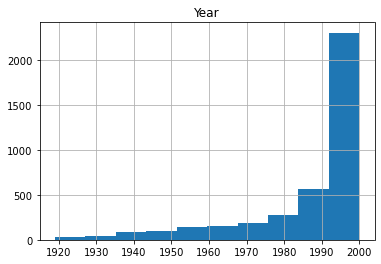

In [13]:
data.sort_values(by = "Year", ascending = False)

data.hist(["Year"])

# The mode of the dataset is the most recent years (1995-2000), indicating an upsurge in movie production
# It sees a strong skew towards the left

In [14]:
data["Year"].mean()

# Very high mean, meaning an unequal distribution of values (see above)

1986.0669585372134

In [15]:
data["Year"].std()

16.895690157525298

In [16]:
data["Year"].describe()

count    3883.000000
mean     1986.066959
std        16.895690
min      1919.000000
25%      1982.000000
50%      1994.000000
75%      1997.000000
max      2000.000000
Name: Year, dtype: float64

## Level 3

### Exercise 3

Show your creativity with the dataset "movies.dat"

In [17]:
# Plots: per year, how many comedies, horror, drama, action movies released:

# 1. Database filtering:

#is_comedy = data["Genre"].str.contains('Comedy') # This code returns a BOOLEAN MASK of whether it's a comedy

is_comedy = data[data["Genre"].str.contains('Comedy')]    # SELECTS all movies that are comedies, etc.

is_horror = data[data["Genre"].str.contains('Horror')]

is_drama = data[data["Genre"].str.contains('Drama')]

is_action = data[data["Genre"].str.contains('Action')]


Text(0.5, 1.0, 'Action movies produced per year')

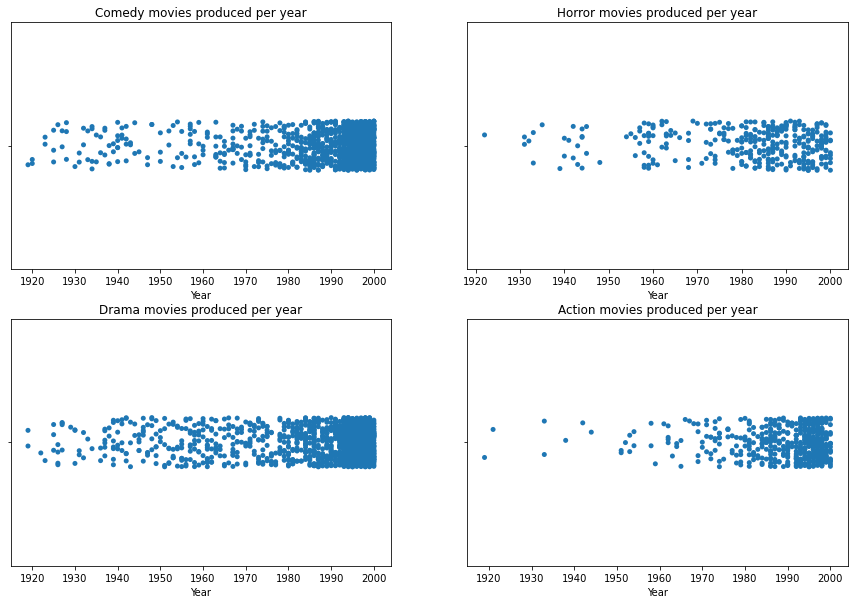

In [18]:
# 2. Plotting results:

fig, axes = plt.subplots(2, 2, figsize = (15, 10))

plot1 = sns.stripplot(ax = axes[0, 0], data= is_comedy, x="Year")
axes[0, 0].set_title("Comedy movies produced per year")

plot2 = sns.stripplot(ax = axes[0, 1], data= is_horror, x="Year")
axes[0, 1].set_title("Horror movies produced per year")

plot3 = sns.stripplot(ax = axes[1, 0], data= is_drama, x="Year")
axes[1, 0].set_title("Drama movies produced per year")

plot4 = sns.stripplot(ax = axes[1, 1], data= is_action, x="Year")
axes[1, 1].set_title("Action movies produced per year")

# It can be seen that all movie genres have seen a surge in frequency in recent years.
# Comedy and Drama remain the most popular, Horror being the least popular of those studied